# Week 6 (Decision Tree)

## Background
In this exercise, we will look at how to create our Decision Tree using Python. <br>
You will need the file "Tennis.csv". <br>
Put the file "Tennis.csv" in the same folder as this Jupyter Notebook.

## Importing Libraries
We will be using the scikit-learn library to build our Decision Tree, which is the Decision Tree Classifier. <br>
The link to the documentation is: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html <br>
Please take the time to read through it. <br> <br>
We are also using the two libraries for visualizing the output.<br>
In case your library graphviz isn't working properly, you can refer to the solution here: https://iotespresso.com/how-to-install-graphviz-on-windows/
    

In [1]:
import pandas as pd     # for data manipulation (numbers)
import numpy as np      # for data manipulation (table format)

# importing from scikit-learn library
from sklearn.model_selection import train_test_split  # for splitting the data into train and test samples
from sklearn.metrics import classification_report     # for model evaluation metrics
from sklearn import tree                              # for decision tree models
from sklearn import preprocessing                     # to change non-numerical labels to numerical labels

# importing libraries for visualization
import plotly.express as px                           # for data visualization
import plotly.graph_objects as go                     # for data visualization
import graphviz                                       # for plotting decision tree graphs

# Read in the weather data csv
df=pd.read_csv('Tennis.csv', encoding='utf-8')
df

,Day,Outlook,Temperature,Humidity,Wind,Play Tennis?
0,1,Sunny,Hot,High,Light,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Light,Yes
3,4,Rain,Mild,High,Light,Yes
4,5,Rain,Cool,Normal,Light,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Light,No
8,9,Sunny,Cool,Normal,Light,Yes
9,10,Rain,Mild,Normal,Light,Yes


### Questions:
1. How many rows of entries?
2. Does the table contain header?
3. How many features are there?

In [2]:
# Answers:
# 1. 14 rows of data
# 2. yes, the table contains header ("Day", "Outlook", "Temperature", "Humidity", "Wind", "Play Tennis?")
# 3. There are 5 features ("Day", "Outlook", "Temperature", "Humidity", "Wind", "Play Tennis?"), however we will not be using "Day" for our analysis.

## Label Encoding
For this Decision Tree Classifier, we can only use numerical labels. <br>
Therefore, let's change the categorical data to numeric type. We will use Label Encoding.

In [3]:
le = preprocessing.LabelEncoder()
df['Outlook'] = le.fit_transform(df['Outlook'])
df['Temperature'] = le.fit_transform(df['Temperature'])
df['Humidity'] = le.fit_transform(df['Humidity'])
df['Wind'] = le.fit_transform(df['Wind'])
df


## Please ensure that the representation are the same as the below comments
## Otherwise, please follow the representation on your Jupyter Notebook

# Outlook:      Sunny = 2,    Overcast = 0,    Rain = 1
# Temperature:  Hot = 1,      Mild = 2,        Cool = 0
# Humidity:     High = 0,     Normal = 1
# Wind:         Light = 0,    Strong = 1

,Day,Outlook,Temperature,Humidity,Wind,Play Tennis?
0,1,2,1,0,0,No
1,2,2,1,0,1,No
2,3,0,1,0,0,Yes
3,4,1,2,0,0,Yes
4,5,1,0,1,0,Yes
5,6,1,0,1,1,No
6,7,0,0,1,1,Yes
7,8,2,2,0,0,No
8,9,2,0,1,0,Yes
9,10,1,2,1,0,Yes


# Split Data 
We will split our data into both training data and testing data.

In [4]:
X=df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y=df['Play Tennis?'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split 80% for training and 20% for testing data

In [5]:
# view output of training data
X_train, y_train

(    Outlook  Temperature  Humidity  Wind
 11        0            2         0     1
 9         1            2         1     0
 3         1            2         0     0
 5         1            0         1     1
 8         2            0         1     0
 4         1            0         1     0
 7         2            2         0     0
 10        2            2         1     1
 6         0            0         1     1
 0         2            1         0     0
 2         0            1         0     0,
 array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
        'Yes'], dtype=object))

In [6]:
# view output of testing data
X_test, y_test

(    Outlook  Temperature  Humidity  Wind
 12        0            1         1     0
 1         2            1         0     1
 13        1            2         0     1,
 array(['Yes', 'No', 'No'], dtype=object))

# Modeling
We will train the model using the fit function.

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Evaluations and Predictions 
In this section, we will look at how we can evaluate the model's performance.

In [8]:
# Predict class labels on training data
pred_labels_training = clf.predict(X_train)

# Predict class labels on a test data
pred_labels_testing = clf.predict(X_test)

### General tree properties

In [9]:
print('Classes: \t\t', clf.classes_)
print('Tree Depth: \t\t', clf.tree_.max_depth)
print('No. of leaves: \t\t', clf.tree_.n_leaves)
print('No. of features: \t', clf.n_features_)

Classes: 		 ['No' 'Yes']
Tree Depth: 		 3
No. of leaves: 		 5
No. of features: 	 4


### Evaluation on training data

In [10]:
score_tr = clf.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_training))

Accuracy Score:  1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         8

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



### Evaluation on testing data

In [11]:
score_te = clf.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_testing))

Accuracy Score:  1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



### Questions:
1. What is your test accuracy score? 
2. Click "Run All" to repeat the whole jupyter notebook. Do you see any changes?
3. In what scenario would it yield a better test accuracy?

In [12]:
# Answers:
# 1. Test accuracy score can be either 0.3333, 0.6667, or 1.0000
# 2. Test accuracy score may change to either one of the values
# 3. Test accuracy is better when testing data contains both labels "Yes" and "No"

## Visualizing the Tree
We will be using the graphviz to display the tree.

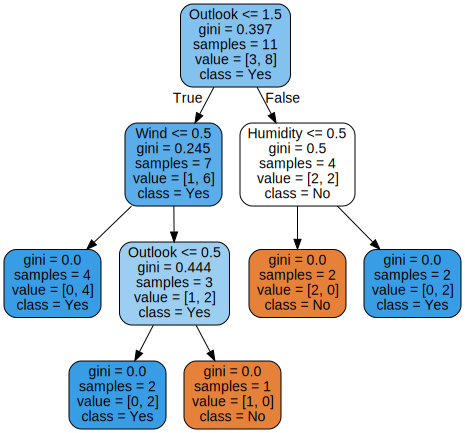

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns, 
                                class_names=[str(list(clf.classes_)[0]), 
                                             str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True, 
                                #rotate=True,
                               ) 
graph = graphviz.Source(dot_data)
graph

### Questions:
1. How to read the graph?
2. From the previous question, we know the accuracy varies. How can we improve the accuracy?
3. In the codes above, we are using the default setting. Referring to the documentation for scikit-learn, what other parameters can you change?

In [15]:
# Answers:

# 1. For root, Outlook <= 1.5 means to refer to Outlook = 0, 1 (using the representation, they are Overcast, Rain).
#    gini is the measure of impurity. Gini = 0.0 means there is only 1 label for the leaf. 
#    samples refer to the number of dataset at the leaf.
#    value = [number of No, number of Yes]
#    It is a binary tree, hence it will the output is Yes/No. The majority in value will determine the class.
#### The root may change when we re-run the codes, due to the randomness in both the splitting data and the Decision Tree Classifier.

# 2. Accuracy is affected due to low testing data (only 3 data points). 
#    We can improve it by simply duplicating the entries by 2x or 3x.

# 3. Please refer to the documentation and see which parameter to change.